## This notebook provides basic EDA to explore the dataset given

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

import cv2

import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dataset_path = '/content/drive/MyDrive/Image_Processing_Manhole_Dataset'
subfolders = ['train', 'valid', 'test']

In [ ]:
base_dataset_path = '/content/drive/MyDrive/Image_Processing_Manhole_Dataset'
subfolders = ['train', 'valid', 'test']

# List to store individual dataframes
dataframes_list = []

print(f"\nSearching for '_classes.csv' in: {subfolders} directories...")

for folder in subfolders:
    csv_file_path = os.path.join(base_dataset_path, folder, '_classes.csv')
    if os.path.exists(csv_file_path):
        print(f"Found '{folder}/_classes.csv'. Reading file...")
        try:
            # Read the CSV file into a temporary DataFrame
            temp_df = pd.read_csv(csv_file_path)

            # Select the required columns: 'filename' and 'closed manhole'
            # The .copy() method is used to avoid SettingWithCopyWarning
            required_columns_df = temp_df[['filename', ' closed manhole']].copy()

            # Add a 'split' column to know which dataset split the data came from
            required_columns_df['split'] = folder

            # Append the processed DataFrame to our list
            dataframes_list.append(required_columns_df)
            print(f"Successfully processed {folder} data. Shape: {required_columns_df.shape}")

        except KeyError:
            print(f"Error: The file '{csv_file_path}' does not contain the required columns.")
        except Exception as e:
            print(f"An unexpected error occurred while reading {csv_file_path}: {e}")
    else:
        print(f"Warning: '{csv_file_path}' not found. Skipping this folder.")

# 4. Concatenate all DataFrames into a single one
if dataframes_list:
    print("\nConcatenating all DataFrames...")
    final_df = pd.concat(dataframes_list, ignore_index=True)
    print("Dataset creation complete.")

    # 5. Display the final DataFrame's information
    print("\n--- Final Merged Dataset Info ---")
    print(f"Total number of samples: {len(final_df)}")
    print("DataFrame Head:")
    print(final_df.head())
    print("\nDataFrame Info:")
    final_df.info()
else:
    print("\nNo '_classes.csv' files were found and processed. Final DataFrame is empty.")



Searching for '_classes.csv' in: ['train', 'valid', 'test'] directories...
Found 'train/_classes.csv'. Reading file...
Successfully processed train data. Shape: (1572, 3)
Found 'valid/_classes.csv'. Reading file...
Successfully processed valid data. Shape: (455, 3)
Found 'test/_classes.csv'. Reading file...
Successfully processed test data. Shape: (229, 3)

Concatenating all DataFrames...
Dataset creation complete.

--- Final Merged Dataset Info ---
Total number of samples: 2256
DataFrame Head:
                                            filename   closed manhole  split
0  AIWQJPZJ29WH_jpg.rf.0b1801d9d99fdeae70f17fef6e...                1  train
1  AM3SN55DKYMC_jpg.rf.07f432d5dc789090ee6fbadb9c...                1  train
2  13_png_jpg.rf.078f167725d3effd866a684c568fed1e...                0  train
3  1F3XHKMYD2ZN_jpg.rf.0b2310666a6a88b79d0c16d8b6...                1  train
4  X2Z4K1G8G4DQ_jpg.rf.0b5dc52d0decc7c805ed196411...                1  train

DataFrame Info:
<class 'pandas.core.

In [ ]:
final_df

,filename,closed manhole,split
0,AIWQJPZJ29WH_jpg.rf.0b1801d9d99fdeae70f17fef6e...,1,train
1,AM3SN55DKYMC_jpg.rf.07f432d5dc789090ee6fbadb9c...,1,train
2,13_png_jpg.rf.078f167725d3effd866a684c568fed1e...,0,train
3,1F3XHKMYD2ZN_jpg.rf.0b2310666a6a88b79d0c16d8b6...,1,train
4,X2Z4K1G8G4DQ_jpg.rf.0b5dc52d0decc7c805ed196411...,1,train
...,...,...,...
2251,UXPCYETCC247_jpg.rf.ef8b8fe8b54e8128335068c246...,1,test
2252,53a2607cdfe647d89fcfac4d71814b46_jpeg_jpg.rf.f...,0,test
2253,HEJ3VVXF5GX8_jpg.rf.fc2474eabcf36e2718961d98cb...,1,test
2254,55_png_jpg.rf.fba139d03f9a58c310f860d5debcfd01...,0,test


In [ ]:
final_df[' closed manhole']

In [ ]:
train_df = final_df[final_df['split'] == 'train']
valid_df = final_df[final_df['split'] == 'valid']
test_df = final_df[final_df['split'] == 'test']

In [ ]:
#change columns name

train_df.columns = ['filename', 'closed_manhole', 'split']
valid_df.columns = ['filename', 'closed_manhole', 'split']
test_df.columns = ['filename', 'closed_manhole', 'split']

In [ ]:
train_df.count()

,0
filename,1572
closed_manhole,1572
split,1572


In [ ]:
valid_df.count()

,0
filename,455
closed manhole,455
split,455


In [ ]:
test_df.count()

,0
filename,229
closed manhole,229
split,229


In [ ]:
train_df["closed_manhole"].value_counts()

,count
closed_manhole,
1,1243
0,329


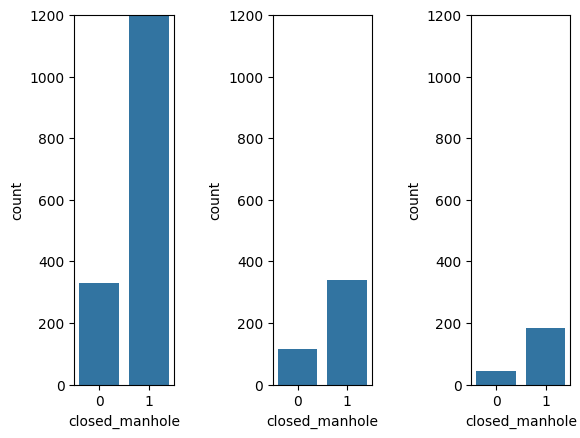

In [ ]:


plt.subplot(1,3,1)
sns.countplot(x="closed_manhole", data=train_df)
plt.ylim(0, 1200)

plt.subplot(1,3,2)
sns.countplot(x="closed_manhole", data=valid_df)
plt.ylim(0, 1200)

plt.subplot(1,3,3)
sns.countplot(x="closed_manhole", data=test_df)
plt.ylim(0, 1200)


plt.subplots_adjust(wspace=1, hspace=0.4)
plt.show()

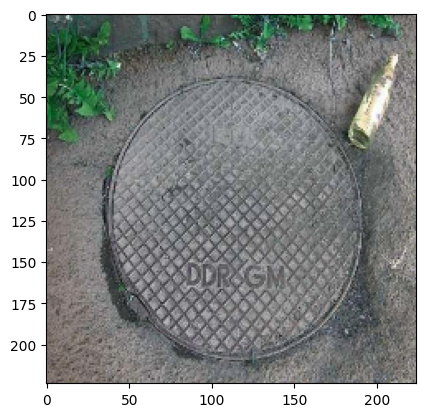

In [ ]:
import cv2
ID = 1571


img = cv2.imread(os.path.join("/content/drive/MyDrive/Image_Processing_Manhole_Dataset/train/", train_df.iloc[ID, 0]))

img = cv2.resize(img, (224, 224))

plt.imshow(img)
plt.show()